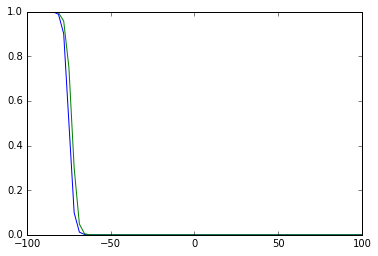

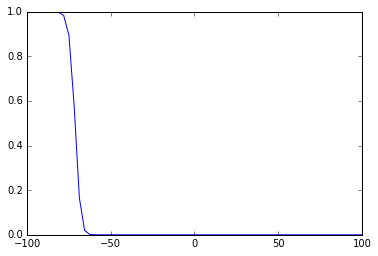

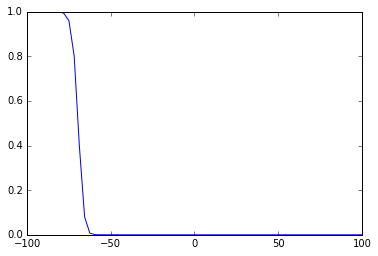

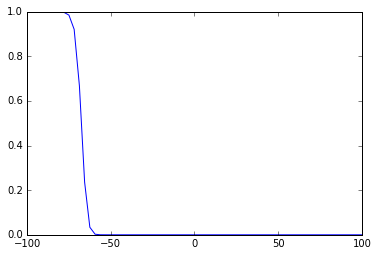

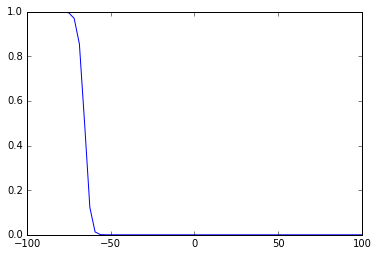

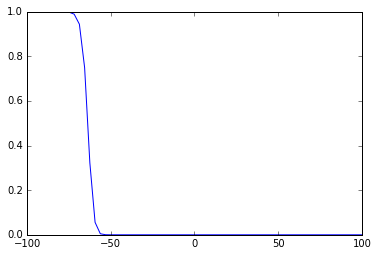

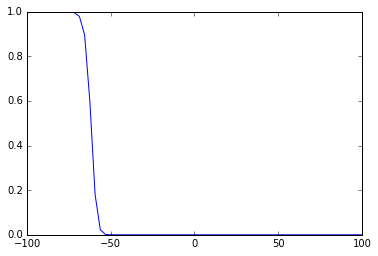

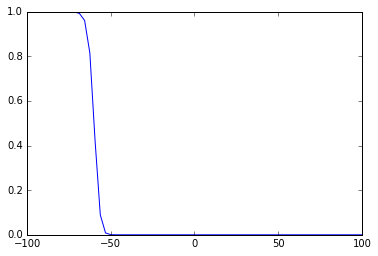

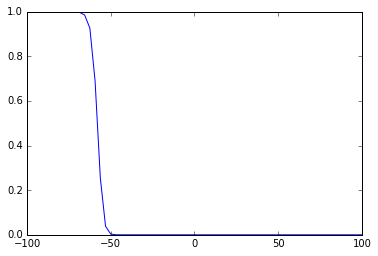

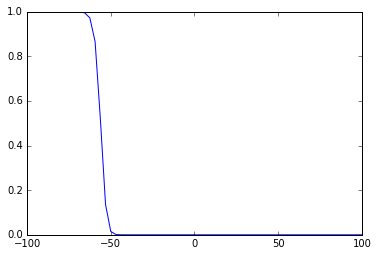

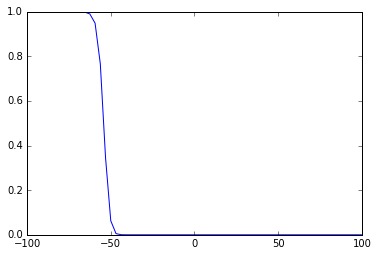

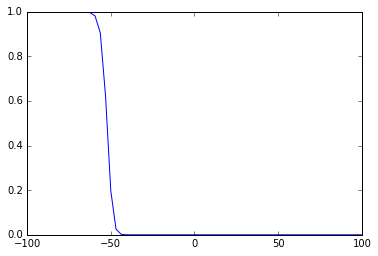

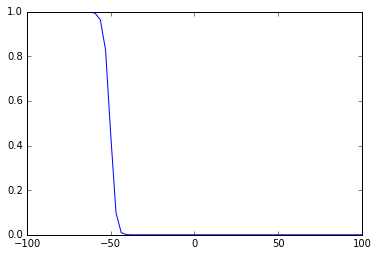

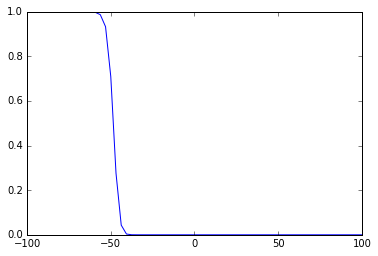

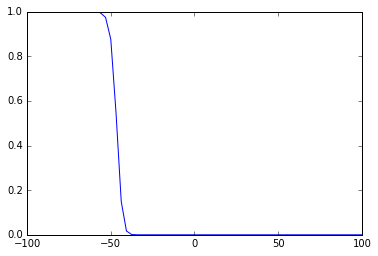

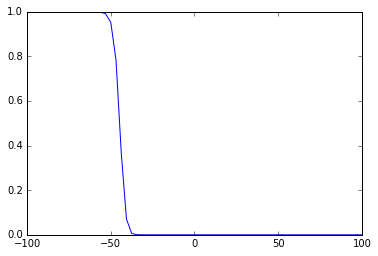

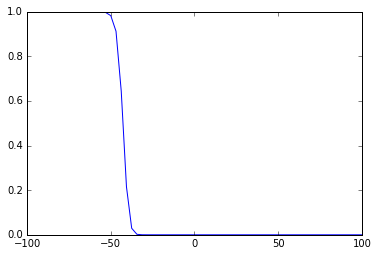

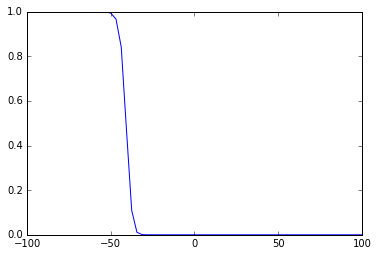

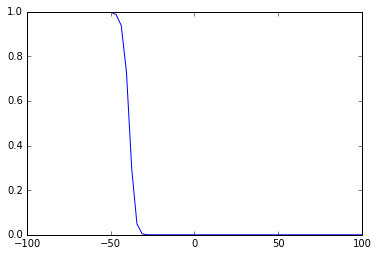

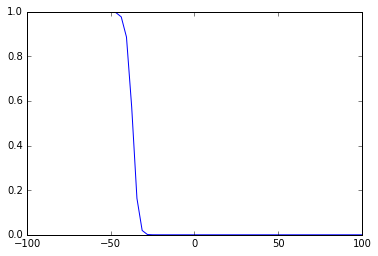

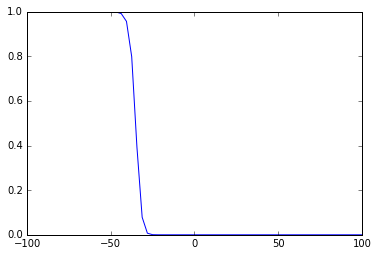

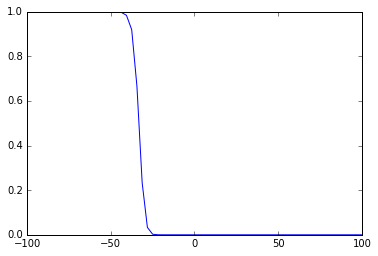

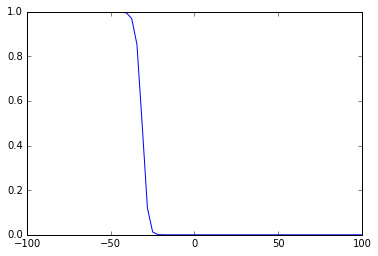

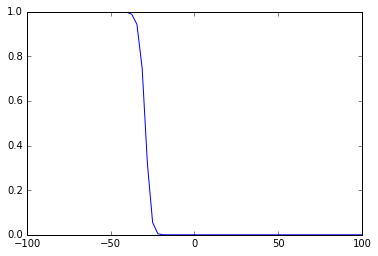

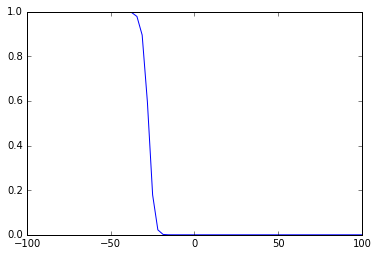

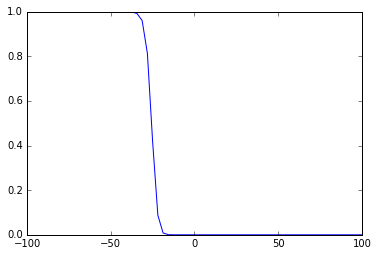

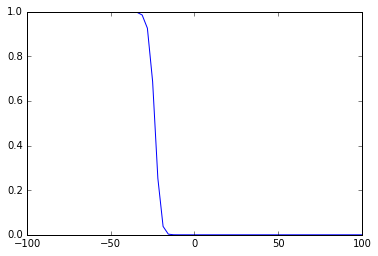

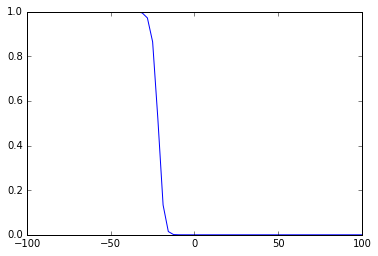

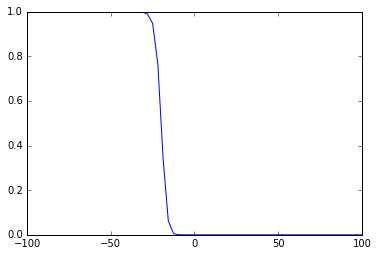

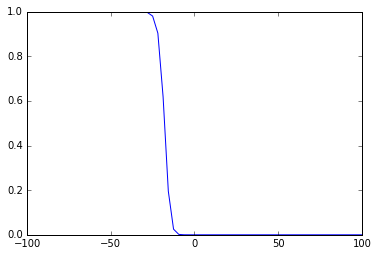

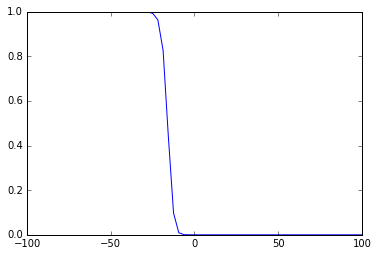

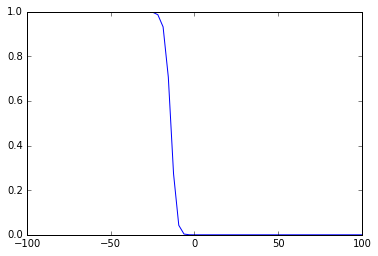

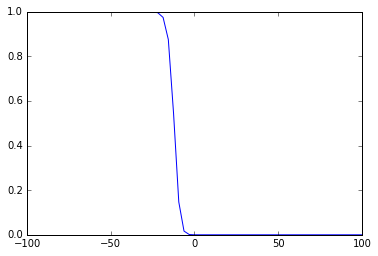

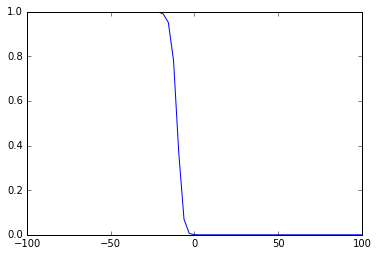

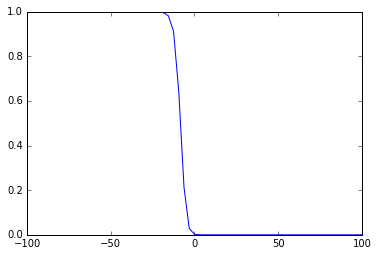

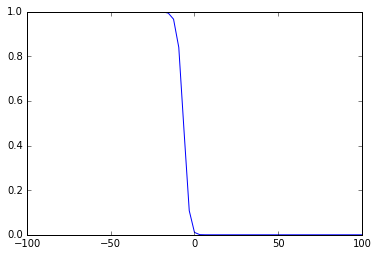

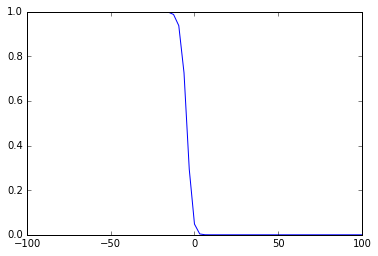

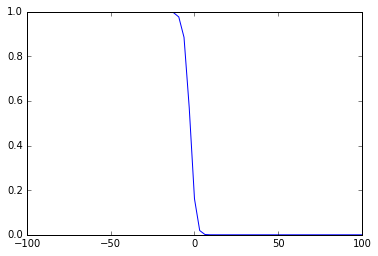

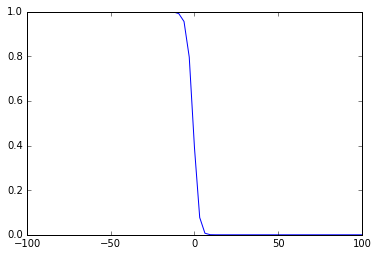

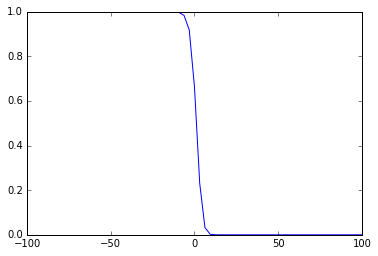

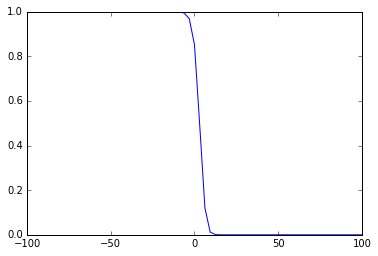

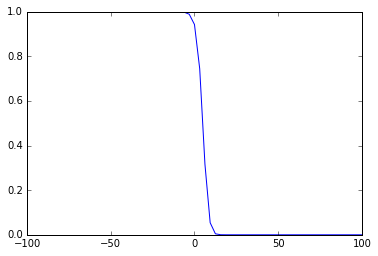

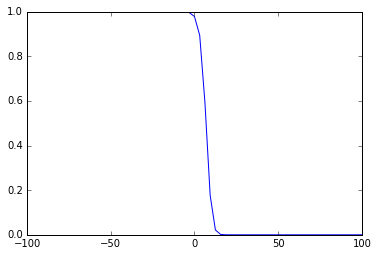

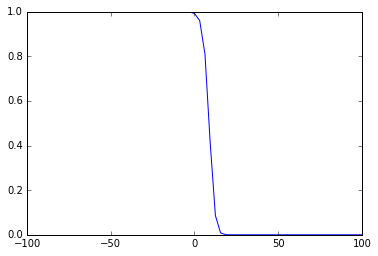

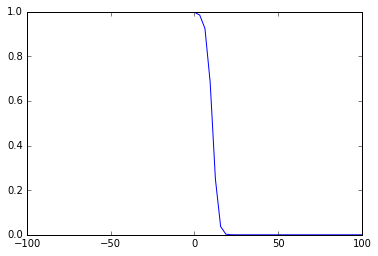

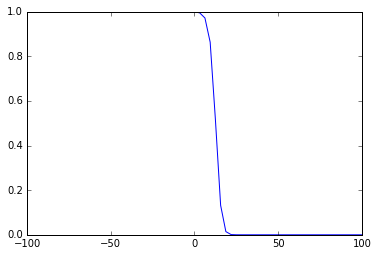

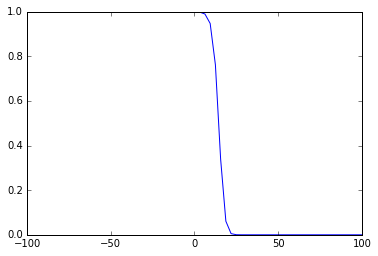

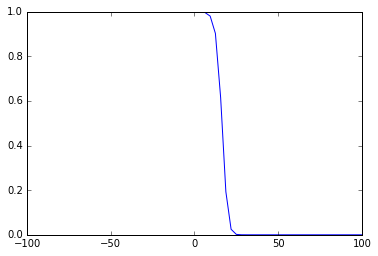

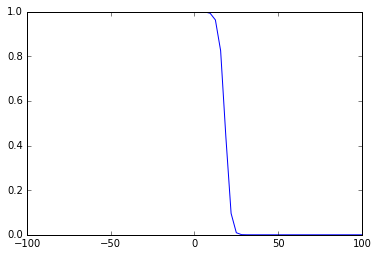

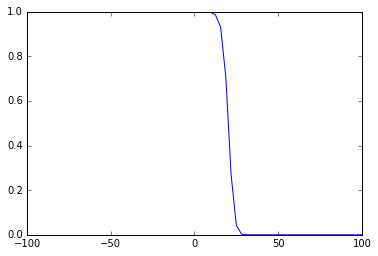

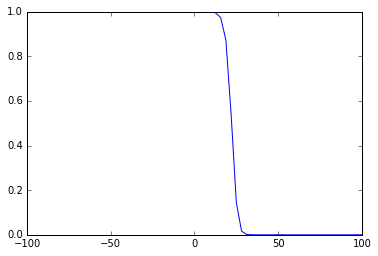

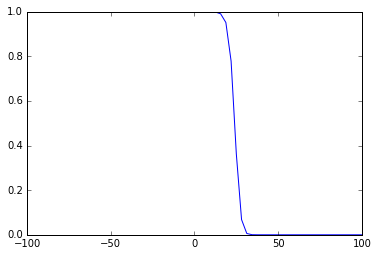

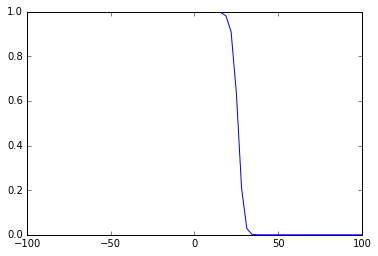

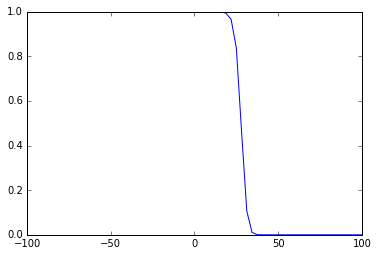

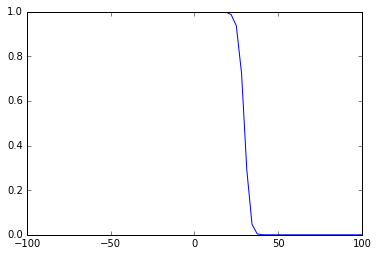

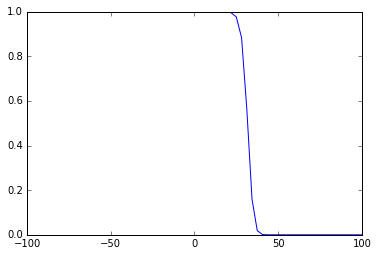

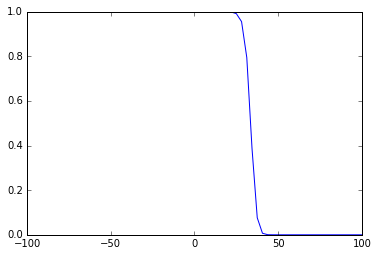

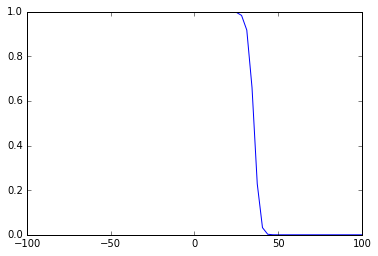

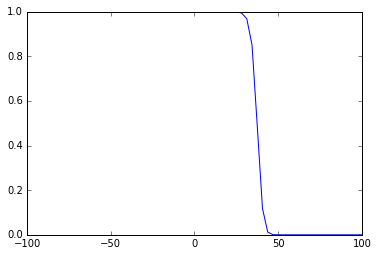

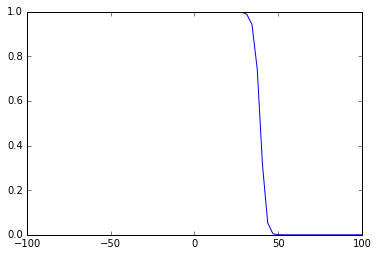

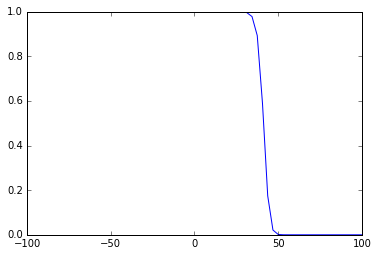

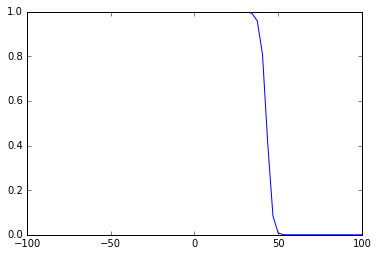

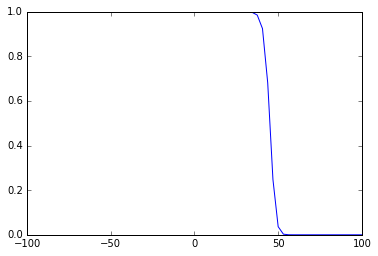

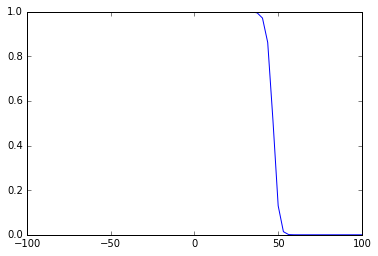

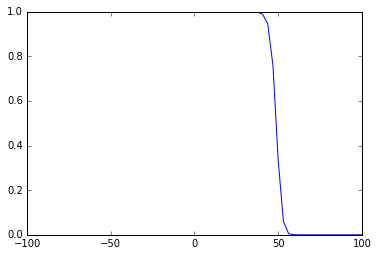

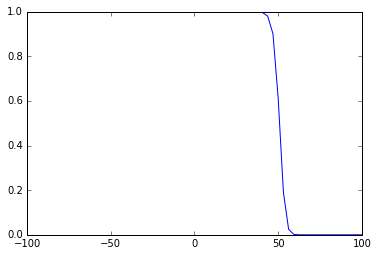

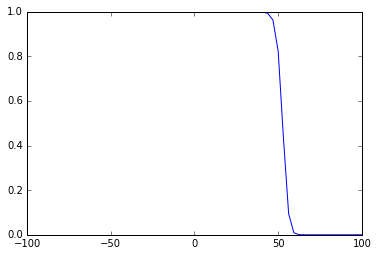

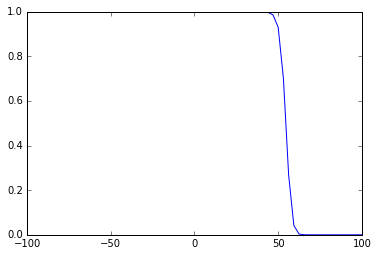

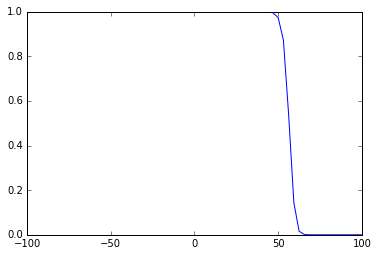

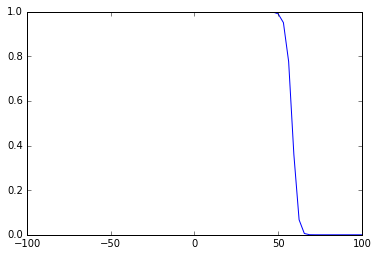

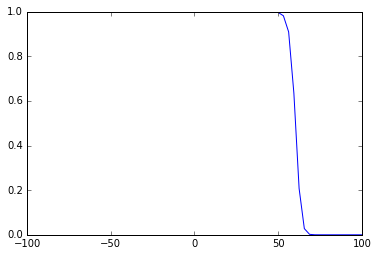

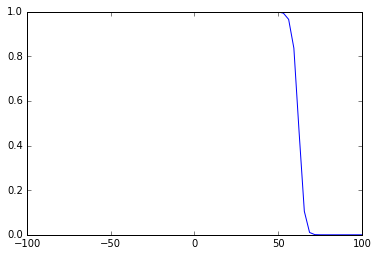

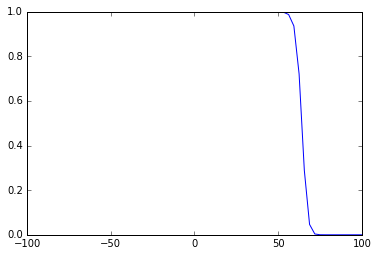

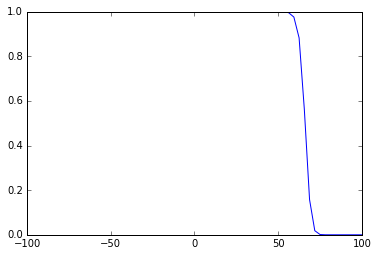

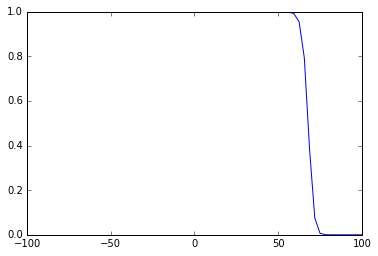

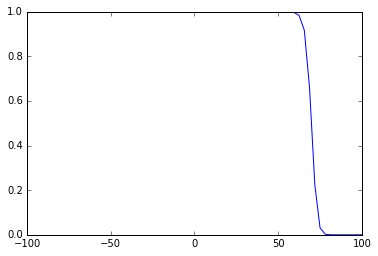

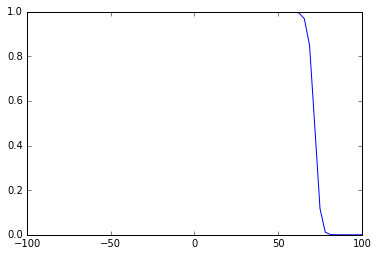

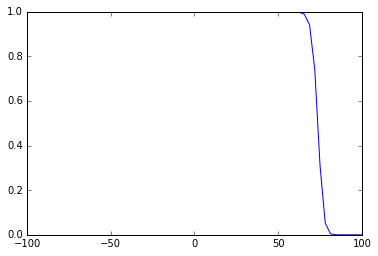

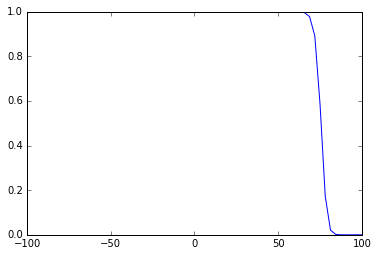

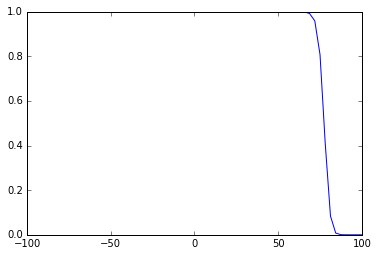

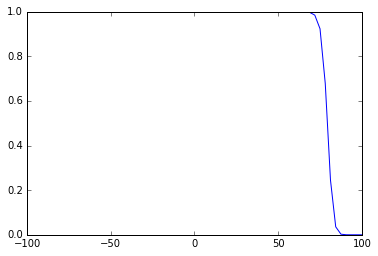

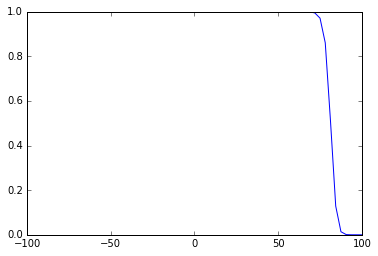

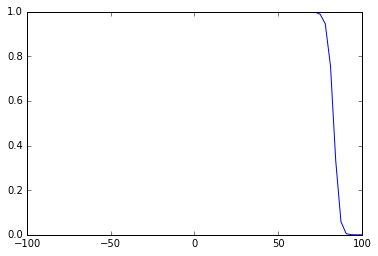

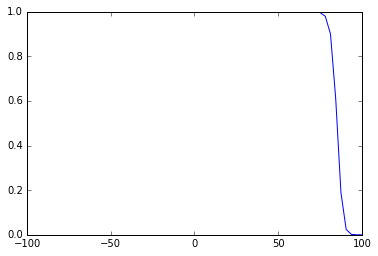

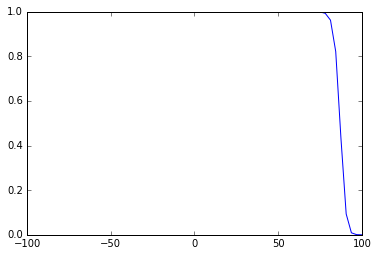

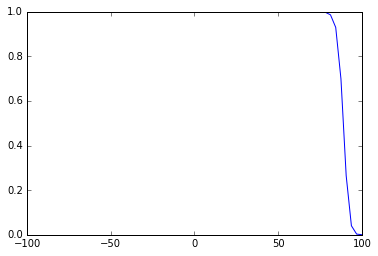

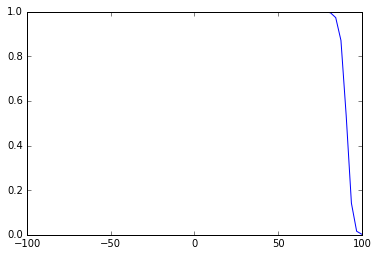

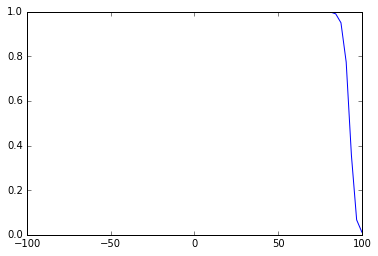

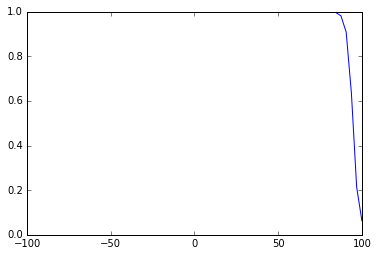

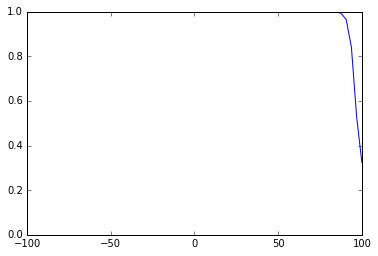

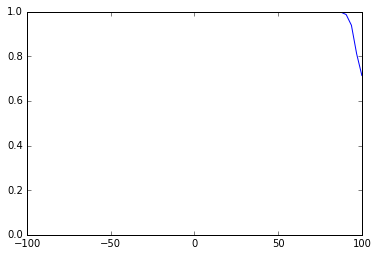

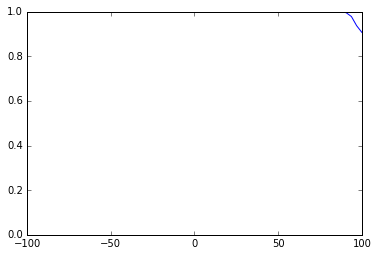

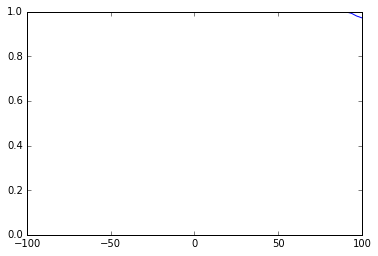

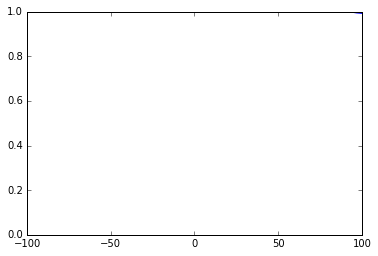

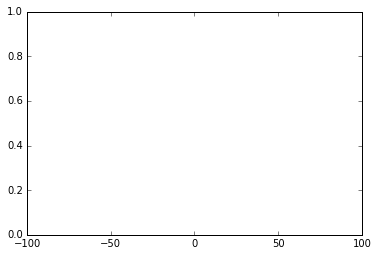

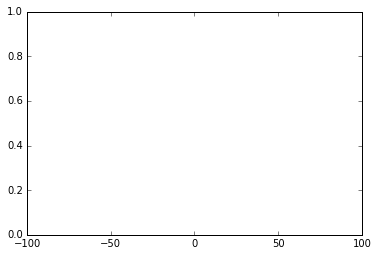

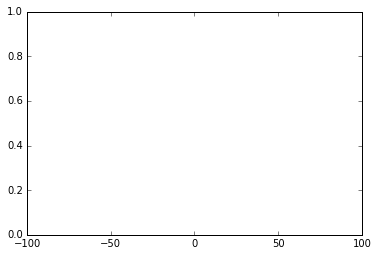

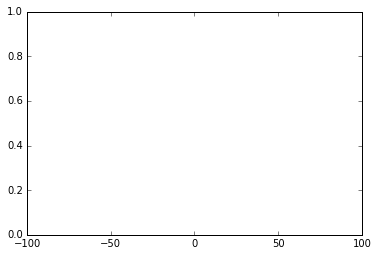

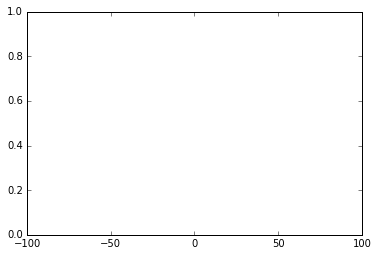

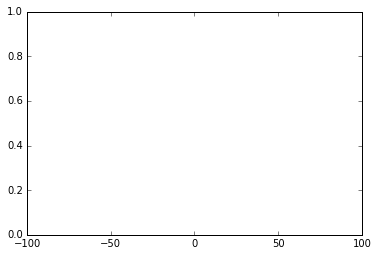

In [12]:
%matplotlib inline
from fenics import *
import pylab

#model parameters
D = Constant(1.)      #diffusion coeff
a = Constant(1.)      #reaction term scaling
alpha = Constant(0.1) #"threshold" value

#time parameters
dt = 2.5
tstop = 250.0
t = 0.0

# Domain and solution space
L = 100.
N = 64
domain = IntervalMesh(N, -L, L)
V = FunctionSpace(domain, "Lagrange", 1)

#cubic reaction term
def f(u):
    return a*u*(1-u)*(u-alpha)

# Nonlinear variational formulation
q = TestFunction(V)
u = Function(V)
u0 = Function(V)

F = (u-u0)/dt*q*dx + inner(D*grad(u), grad(q))*dx - f(u)*q*dx

# initial value
u.interpolate(Expression("1./2.*(1-tanh(sqrt(a/(8*D))*(x[0]-x0)))", \
                         a=a, alpha=alpha,D=D, x0=-L*0.75))

plot(u)

# Iterate
while t<tstop:
    # Update previous solution
    u0.assign(u)

    solve(F==0, u)
    t += dt
    #print(t, "Min:", u.vector().min(), "Max:", u.vector().max())
    p = plot(u)
    p[0].axes.set_aspect('auto')
    p[0].axes.set_ylim([0, 1])
    pylab.show()
